# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_dataframe_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
#clean = clean_df["valueforeachregimen"]
# # Display the data table for preview
#data_complete.head()
# study_results.head()
# data_complete


In [2]:
#data_complete.head()
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_dataframe_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.[]
mun_mice = len(merge_dataframe_df["Mouse ID"].value_counts())
# data_complete["Mouse ID"].unique()
mun_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = merge_dataframe_df.loc[merge_dataframe_df.duplicated(subset=["Mouse ID", "Timepoint" ]),"Mouse ID"].unique()
duplicate_data_df

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mouse_data = merge_dataframe_df.loc[merge_dataframe_df["Mouse ID"] == ["g989"]
# duplicate_mouse_data

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_dataframe = merge_dataframe_df[merge_dataframe_df["Mouse ID"].isin(duplicate_data_df)==False]

clean_merge_dataframe


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.

len(clean_merge_dataframe["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = clean_merge_dataframe.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_drug = clean_merge_dataframe.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_drug = clean_merge_dataframe.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_drug = clean_merge_dataframe.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_drug = clean_merge_dataframe.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#create the summary table 
summary_table = pd.DataFrame({
    
    "Mean Tumor Volume":mean_drug,
    "median Tumor Volume":Median_drug,
    "Variance Tumor Volume":variance_drug,
    "Std. Dev Tumor Volume":std_drug,
    "Std. Err Tumor Volume":sem_drug
    
    
})
summary_table.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,median Tumor Volume,Variance Tumor Volume,Std. Dev Tumor Volume,Std. Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = clean_merge_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

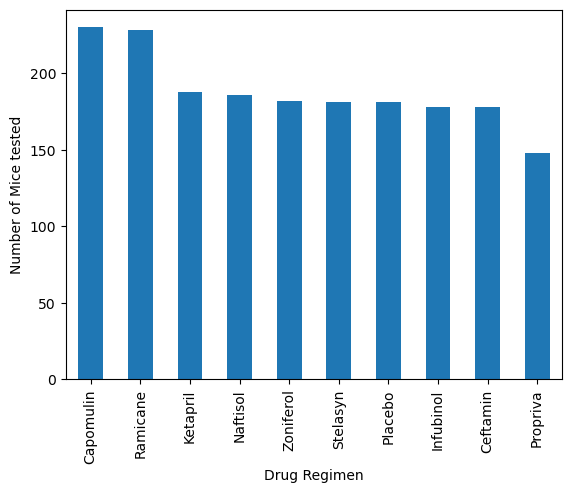

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = clean_merge_dataframe["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice tested")
plt.show()


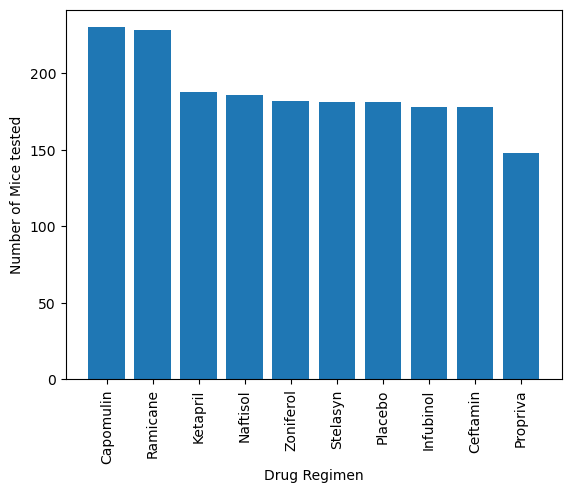

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_merge_dataframe["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice tested")
plt.show()


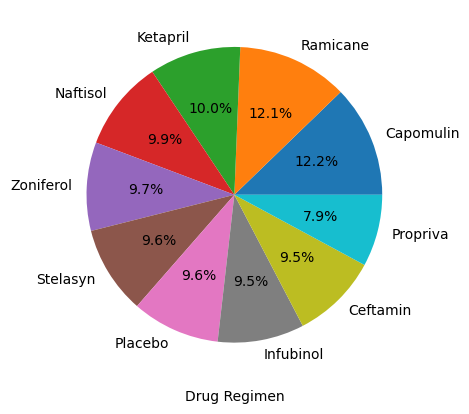

In [14]:
# Generate a pie plot showing the distribution of Drug regimen using Pandas

counts = clean_merge_dataframe["Drug Regimen"].value_counts()
counts.values
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
# plt.ylabel("Number of Mice")

plt.show()


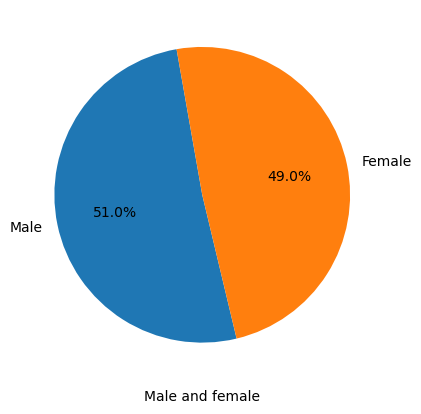

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_merge_dataframe["Sex"].value_counts()
counts.values
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%", startangle=100)
plt.xlabel("Male and female")
plt.xticks(rotation=90,)
# plt.ylabel("Number of Mice")

plt.show()



In [16]:
#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#----------------------------------
drug_regimen_list = clean_merge_dataframe[clean_merge_dataframe['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
group_drug_regimen_list = drug_regimen_list.groupby(["Mouse ID", "Drug Regimen"])
final_tumor_volume_df = group_drug_regimen_list["Tumor Volume (mm3)"].last().to_frame().reset_index().drop(columns="Mouse ID")
final_tumor_volume_df
#------------------------------------


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
# final_tumor_vol.head()
# tumor_vol_list[1].to_list()
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volume_boxplot = final_tumor_volume_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid=False
plt.title('')
plt.suptitle('')
tumor_volume_boxplot.set_ylabel("Final Tumor Volume (mm3)")
tumor_volume_boxplot.set_xlabel("Drug Regimen")


                                                     



SyntaxError: invalid syntax (3975739174.py, line 7)

In [ ]:
#clean_merge_dataframe


## Line and Scatter Plots

In [ ]:
four_regimens = clean_merge_dataframe[clean_merge_dataframe['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
four_regimens

In [22]:


capomulin_var = clean_merge_dataframe.loc[clean_merge_dataframe["Drug Regimen"] == "Capomulin"]
capomulin_var

mouseb128 = capomulin_var.loc[capomulin_var["Mouse ID"] == "b128"]
mouseb128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


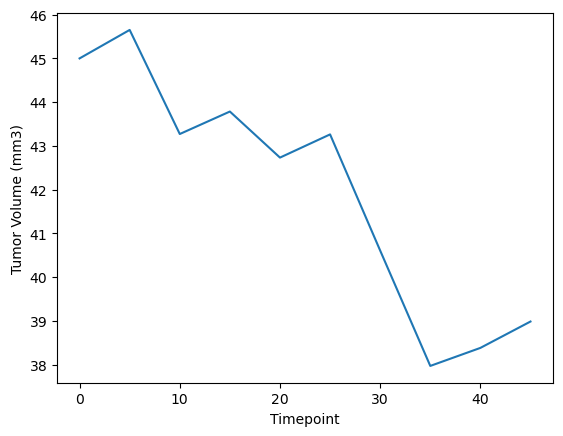

In [26]:
plt.plot(mouseb128["Timepoint"], mouseb128["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

             

In [29]:

# average_tumor_volume

In [28]:
capomulin_var_df = clean_merge_dataframe.loc[clean_merge_dataframe["Drug Regimen"] == "Capomulin"]
capomulin_var_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


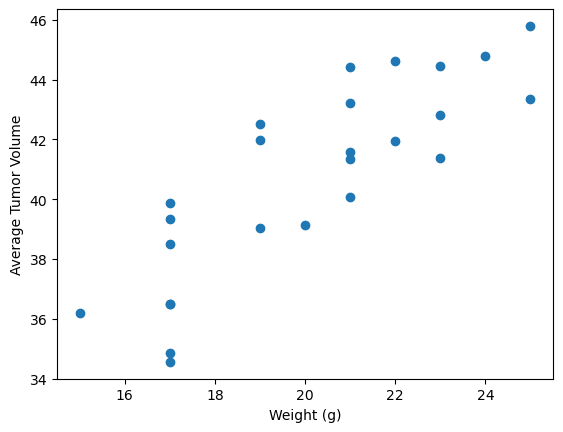

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_group_df = clean_merge_dataframe.loc[clean_merge_dataframe == "capomulin"]
capomulin_var_df = clean_merge_dataframe.loc[clean_merge_dataframe["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_group_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

 


## Correlation and Regression

The correlation between weight and tumor volume is (0.8419363424694721, 2)


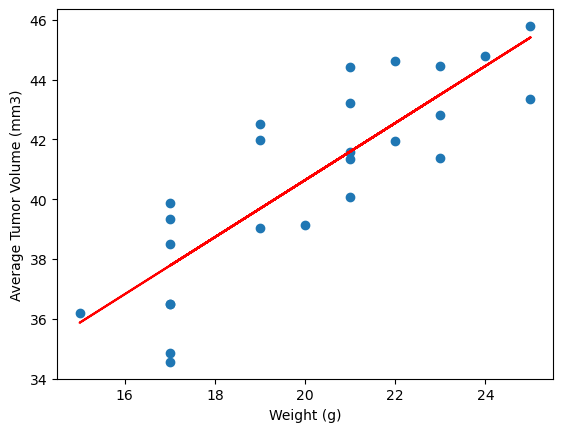

In [40]:
# Calculate the correlation coefficient and linear regression model 
# print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_data = (st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between weight and tumor volume is {correlation_data}")
modole = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
y_values = capomulin_average["Weight (g)"] * modole[0] + modole[1]
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average ["Weight (g)"],y_values, color="red") 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

